## Kaggle Humpback Whale Identification

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [3]:
os.listdir("./input/")

['sample_submission.csv', 'test', 'train', 'train.csv']

In [4]:
train_df = pd.read_csv("./input/train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [5]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("./input/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [6]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    y = onehot_encoded

    return y, label_encoder

In [7]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [8]:
y, label_encoder = prepare_labels(train_df['Id'])

In [9]:
y.shape

(25361, 5005)

In [10]:
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [11]:
from keras.optimizers import adam
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy

model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))

model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(optimizer=adam(lr=0.001), loss='categorical_crossentropy',
              metrics=[categorical_accuracy, top_5_accuracy])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
avg_pool (AveragePooling2D)  (None, 15, 15, 64)        0         
__________

In [13]:
import gc
history = model.fit(X, y, epochs=100, batch_size=128, verbose=1)
gc.collect()

Epoch 1/100
25361/25361 [==============================] - 1374s 54ms/step - loss: 6.1874 - categorical_accuracy: 0.3792 - top_5_accuracy: 0.3859
Epoch 2/100
25361/25361 [==============================] - 1376s 54ms/step - loss: 5.9204 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3900
Epoch 3/100
25361/25361 [==============================] - 1399s 55ms/step - loss: 5.8330 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3907
Epoch 4/100
25361/25361 [==============================] - 1388s 55ms/step - loss: 5.7739 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3909
Epoch 5/100
25361/25361 [==============================] - 1391s 55ms/step - loss: 5.7266 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3922
Epoch 6/100
25361/25361 [==============================] - 1389s 55ms/step - loss: 5.6957 - categorical_accuracy: 0.3811 - top_5_accuracy: 0.3926
Epoch 7/100
25361/25361 [==============================] - 1377s 54ms/step - loss: 5.6623 - categorical_accuracy: 0.3811 - t

25361/25361 [==============================] - 1419s 56ms/step - loss: 0.8354 - categorical_accuracy: 0.7827 - top_5_accuracy: 0.9352
Epoch 57/100
25361/25361 [==============================] - 1423s 56ms/step - loss: 0.8132 - categorical_accuracy: 0.7898 - top_5_accuracy: 0.9391
Epoch 58/100
25361/25361 [==============================] - 1418s 56ms/step - loss: 0.8031 - categorical_accuracy: 0.7954 - top_5_accuracy: 0.9380
Epoch 59/100
25361/25361 [==============================] - 1405s 55ms/step - loss: 0.7793 - categorical_accuracy: 0.7967 - top_5_accuracy: 0.9413
Epoch 60/100
25361/25361 [==============================] - 1408s 56ms/step - loss: 0.7506 - categorical_accuracy: 0.8020 - top_5_accuracy: 0.9450
Epoch 61/100
25361/25361 [==============================] - 1402s 55ms/step - loss: 0.7599 - categorical_accuracy: 0.8034 - top_5_accuracy: 0.9442
Epoch 62/100
25361/25361 [==============================] - 1410s 56ms/step - loss: 0.7131 - categorical_accuracy: 0.8129 - top_5_a

75

In [14]:
model.save('./working/aug_model.hdf5')

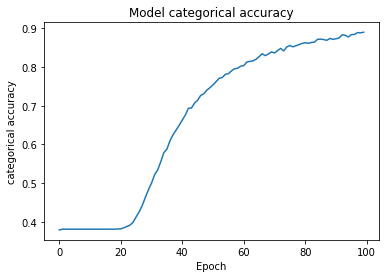

In [15]:
plt.plot(history.history['categorical_accuracy'])
plt.title('Model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.show()

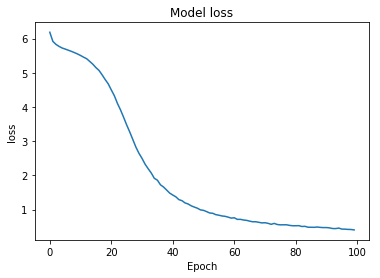

In [16]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

### Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    #hear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #rotation_range=90,
    #featurewise_center=True,
    width_shift_range=0.2,
    height_shift_range=0.2)

train_datagen.fit(X)

In [18]:
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.optimizers import Adam
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [19]:
BATCH_SIZE = 128
EPOCHS = 100

In [20]:
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [21]:
from keras.optimizers import adam
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy

model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))

model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(optimizer=adam(lr=0.001), loss='categorical_crossentropy',
              metrics=[categorical_accuracy, top_5_accuracy])


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
avg_pool (AveragePooling2D)  (None, 15, 15, 64)        0         
__________

In [23]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=20,
                           verbose=1,
                           min_delta=0.00001,
                           mode='min'),
             ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=2,
                               verbose=1,
                               min_delta=0.0001,
                               mode='min'),
             ModelCheckpoint(monitor='val_loss',save_weights_only=True,
                             filepath='./working/aug_model.hdf5',
                             save_best_only=True,
                             mode='min') ,
             ]

In [24]:
# train the model
#checkpointer = ModelCheckpoint(filepath='./working/aug_model.h5', verbose=1, save_best_only=True)

history = model.fit_generator(train_datagen.flow(X, y, batch_size=BATCH_SIZE),
                    steps_per_epoch=X.shape[0] // BATCH_SIZE,
                    epochs=EPOCHS, verbose=1, callbacks=callbacks)


Epoch 1/100
198/198 [==============================] - 1426s 7s/step - loss: 6.2009 - categorical_accuracy: 0.3790 - top_5_accuracy: 0.3851
Epoch 2/100


C:\Users\Naruhiko\Anaconda3\envs\carnd-term1\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: categorical_accuracy,top_5_accuracy,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\Naruhiko\Anaconda3\envs\carnd-term1\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: categorical_accuracy,top_5_accuracy,lr,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\Naruhiko\Anaconda3\envs\carnd-term1\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


198/198 [==============================] - 1409s 7s/step - loss: 5.9614 - categorical_accuracy: 0.3822 - top_5_accuracy: 0.3904
Epoch 3/100
198/198 [==============================] - 1397s 7s/step - loss: 5.8947 - categorical_accuracy: 0.3796 - top_5_accuracy: 0.3883
Epoch 4/100
198/198 [==============================] - 1410s 7s/step - loss: 5.8036 - categorical_accuracy: 0.3819 - top_5_accuracy: 0.3915
Epoch 5/100
198/198 [==============================] - 1396s 7s/step - loss: 5.7783 - categorical_accuracy: 0.3804 - top_5_accuracy: 0.3897
Epoch 6/100
198/198 [==============================] - 1407s 7s/step - loss: 5.7573 - categorical_accuracy: 0.3813 - top_5_accuracy: 0.3909
Epoch 7/100
198/198 [==============================] - 1395s 7s/step - loss: 5.7486 - categorical_accuracy: 0.3814 - top_5_accuracy: 0.3910
Epoch 8/100
198/198 [==============================] - 1405s 7s/step - loss: 5.7469 - categorical_accuracy: 0.3802 - top_5_accuracy: 0.3903
Epoch 9/100
198/198 [===========

198/198 [==============================] - 1401s 7s/step - loss: 5.3897 - categorical_accuracy: 0.3817 - top_5_accuracy: 0.3990
Epoch 61/100
198/198 [==============================] - 1403s 7s/step - loss: 5.3736 - categorical_accuracy: 0.3803 - top_5_accuracy: 0.3972
Epoch 62/100
198/198 [==============================] - 1392s 7s/step - loss: 5.3737 - categorical_accuracy: 0.3814 - top_5_accuracy: 0.3986
Epoch 63/100
198/198 [==============================] - 1407s 7s/step - loss: 5.3689 - categorical_accuracy: 0.3790 - top_5_accuracy: 0.3961
Epoch 64/100
198/198 [==============================] - 1398s 7s/step - loss: 5.3466 - categorical_accuracy: 0.3815 - top_5_accuracy: 0.3992
Epoch 65/100
198/198 [==============================] - 1401s 7s/step - loss: 5.3430 - categorical_accuracy: 0.3791 - top_5_accuracy: 0.3963
Epoch 66/100
198/198 [==============================] - 1395s 7s/step - loss: 5.3358 - categorical_accuracy: 0.3804 - top_5_accuracy: 0.3979
Epoch 67/100
198/198 [====

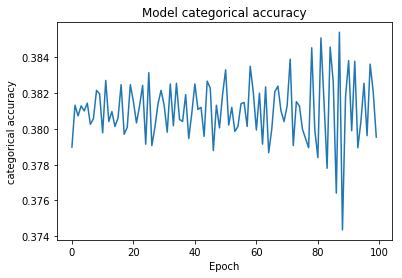

In [25]:
plt.plot(history.history['categorical_accuracy'])
plt.title('Model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.show()

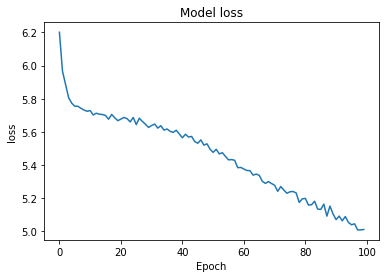

In [26]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [27]:
test = os.listdir("./input/test/")
print(len(test))

7960


In [28]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

In [29]:
X = prepareImages(test_df, test_df.shape[0], "test")
X /= 255

Preparing images
Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg


In [30]:
predictions = model.predict(np.array(X), verbose=1)

7960/7960 [==============================] - 139s 17ms/step


In [31]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [32]:
test_df.head(10)
test_df.to_csv('submission_23.csv', index=False)